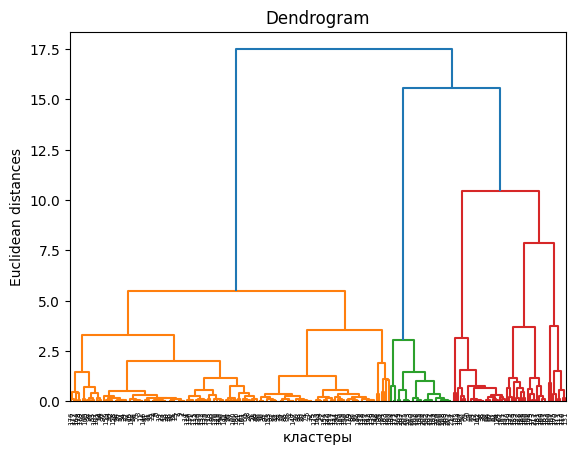

[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 3 3 0 0 0 3 0 0 0 3 3 0 3 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 1 1 1 4 2 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 3 0 0 4 4 4 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 0 0 3 0 0 0 0 3 0 0 4 4 4 2 4 1 2 2 4 4 4 0 0 0 0 0 4 4 4 2
 0 0 3 4 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2]


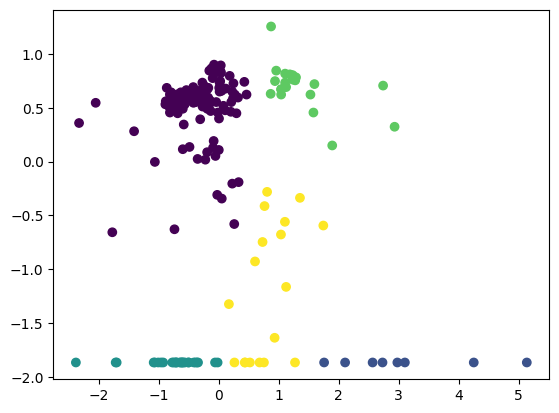

C:\Users\cfifz\AppData\Local\Temp\ipykernel_17336\2823238141.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, Silhouette_measure, 'bx-', color='green')


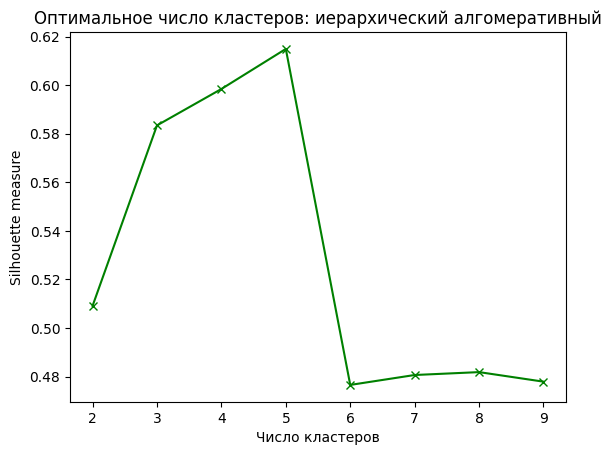

C:\Users\cfifz\PycharmProjects\pythonProject3\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Adjusted Rand Index: 0.1963597085416134
6


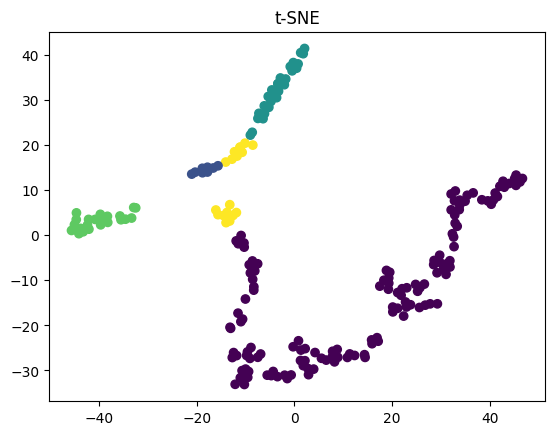

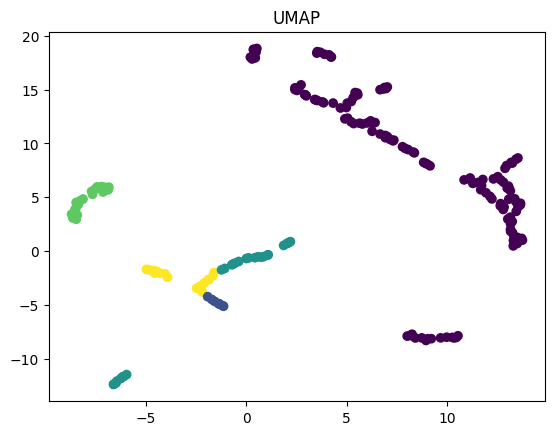

In [1]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

df = pd.read_csv('glass.csv')
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)

Z = df.iloc[:, [1, 3]].values
Z = scaler.fit_transform(Z)
Z = pd.DataFrame(Z)

dendrogram = sch.dendrogram(sch.linkage(Z, method='ward'))
plt.title('Dendrogram')
plt.xlabel('кластеры')
plt.ylabel('Euclidean distances')
plt.show()

model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward', compute_distances=True)
model.fit_predict(Z)
labels = model.labels_
print(labels)
plt.scatter(df.iloc[:, 1], df.iloc[:, 3], c=model.labels_, cmap='viridis')
plt.show()

Silhouette_measure = []
K = range(2, 10)
for num_clusters in K:
    hier = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
    hier.fit_predict(Z)
    Silhouette_measure.append(silhouette_score(Z, hier.labels_))
plt.plot(K, Silhouette_measure, 'bx-', color='green')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette measure')
plt.title('Оптимальное число кластеров: иерархический алгомеративный')
plt.show()

true_labels = df.iloc[:, 10]
cluster_labels = model.labels_
ari = adjusted_rand_score(true_labels, cluster_labels)
print('Adjusted Rand Index:', ari)

print(df.iloc[:, 10].nunique())

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=10, learning_rate=200)
tsne_result = tsne.fit_transform(Z)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=model.labels_, cmap='viridis')
plt.title('t-SNE')
plt.show()


import umap

umap_result = umap.UMAP(n_components=2, n_neighbors=5, min_dist=0.3).fit_transform(Z)

plt.scatter(umap_result[:, 0], umap_result[:, 1], c=model.labels_, cmap='viridis')
plt.title('UMAP')
plt.show()